In [1]:
import pandas as pd
import seaborn as sns
train=pd.read_csv("train.csv")
test=pd.read_csv("test.csv")
train.head()

,id,credit_limit,gender,education_level,marital_status,age,payment_delay_month4(larger value means longer delay),payment_delay_month3(larger value means longer delay),payment_delay_month2(larger value means longer delay),payment_delay_month1(larger value means longer delay),bill_amount_month4,bill_amount_month3,bill_amount_month2,bill_amount_month1,previous_payment_month4,previous_payment_month3,previous_payment_month2,previous_payment_month1,label_month5_payment
0,0,75659.32872,M,graduate_school,married,53.0,-1.0,0.0,0.0,0.0,43.673872,97.336043,617.642189,515.513381,97.336043,617.642189,515.513381,0.000000,0
1,1,10119.28851,F,high_school,married,46.0,0.0,0.0,NaN,1.0,2.378414,217.039935,107.684919,220.712322,209.732445,0.000000,100.594674,22.241495,0
2,2,13374.80610,F,university,married,31.0,1.0,1.0,1.0,1.0,14301.916330,13506.342420,5892.633733,6291.752821,397.170110,752.120619,397.170110,397.501113,0
3,3,157744.09660,M,graduate_school,married,34.0,0.0,0.0,0.0,1.0,8154.002723,14278.876050,18234.124720,13042.939540,14368.707270,18400.055470,1547.887184,2.558114,0
4,5,120385.03030,F,graduate_school,single,29.0,1.0,1.0,1.0,1.0,10575.092340,7130.249304,1572.472869,NaN,193.835523,397.170110,0.000000,1395.861422,0


<AxesSubplot:xlabel='age'>

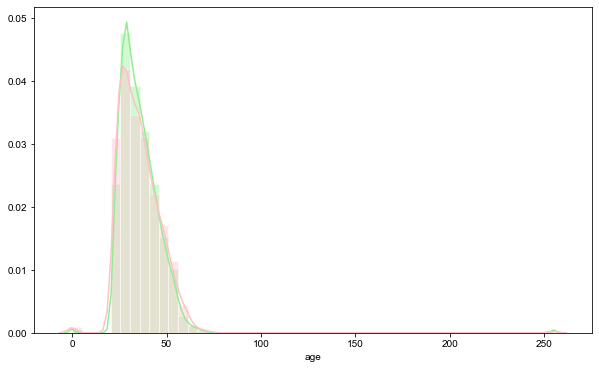

In [2]:
import matplotlib.pyplot as plt
#It seems that whether label_month5_payment is 0 or 1 is not very different in age
fig, axe = plt.subplots(figsize=(10, 6))
sns.set_style("darkgrid")
sns.distplot(train[train["label_month5_payment"]==0]['age'] , ax=axe, color='lightgreen')
sns.distplot(train[train["label_month5_payment"]==1]['age'] , ax=axe, color='pink')

In [3]:
#from the result,we can know that it is a imblanced dataset
pd.value_counts(train["label_month5_payment"])

0    18089
1     2560
Name: label_month5_payment, dtype: int64

In [4]:
#We can find that the maximum age of this data is 255 which is not reasonable so we need to remove it before building the model.
train["age"].describe() #the min age is also strange

count    20508.000000
mean        35.701287
std         12.450595
min          0.000000
25%         28.000000
50%         34.000000
75%         41.000000
max        255.000000
Name: age, dtype: float64

gender
F    0.115431
M    0.136499
Name: label_month5_payment, dtype: float64


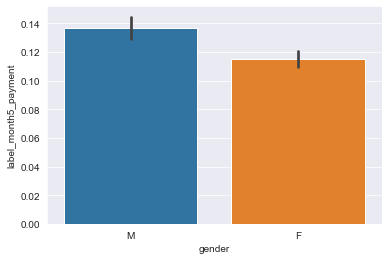

In [5]:
import seaborn as sns
sns.barplot(x ='gender',y="label_month5_payment", data = train) 
print(train.groupby("gender")["label_month5_payment"].mean())
#more likely to delay on label_month5_payment: Men

university         9459
graduate_school    7316
high_school        3273
unknown             245
others               95
unviersity           33
0                    10
Name: education_level, dtype: int64


<AxesSubplot:xlabel='education_level', ylabel='label_month5_payment'>

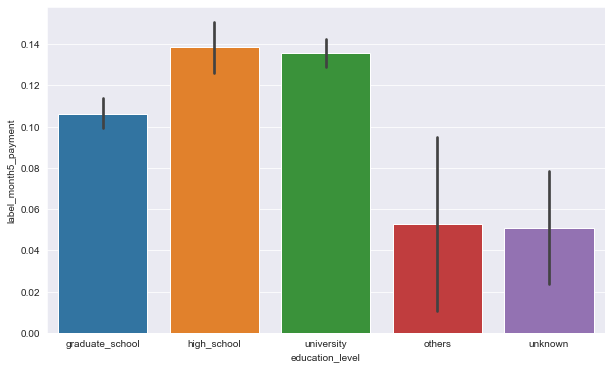

In [6]:
fig, axe = plt.subplots(figsize=(10, 6))
print(pd.value_counts(train["education_level"]))
train["education_level"]=train["education_level"].replace("0","unknown")
test["education_level"]=test["education_level"].replace("0","unknown")
train["education_level"]=train["education_level"].replace("unviersity","university")
test["education_level"]=test["education_level"].replace("unviersity","university")
sns.barplot(x="education_level", y="label_month5_payment", data=train)

single     10985
married     9272
others       211
0             42
Name: marital_status, dtype: int64


<AxesSubplot:xlabel='marital_status', ylabel='label_month5_payment'>

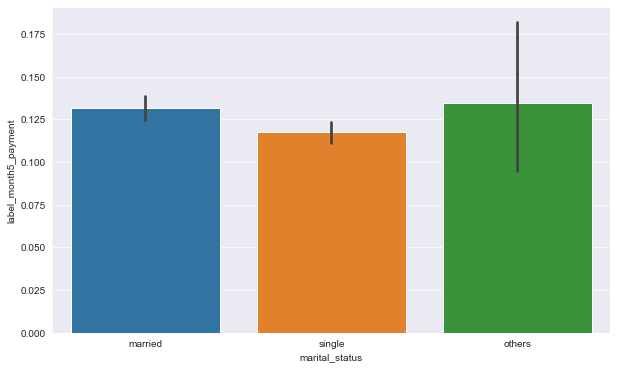

In [7]:
fig, axe = plt.subplots(figsize=(10, 6))
print(pd.value_counts(train["marital_status"]))
train["marital_status"]=train["marital_status"].replace("0","others")
test["marital_status"]=test["marital_status"].replace("0","others")
sns.barplot(x="marital_status", y="label_month5_payment", data=train)

In [8]:
#correspond to my intuition 
train.groupby("education_level")["credit_limit"].mean()

education_level
graduate_school    89471.729849
high_school        50319.787021
others             91779.828130
university         58977.542110
unknown            64268.998806
Name: credit_limit, dtype: float64

0.0
255.0


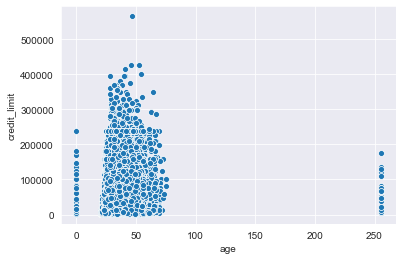

In [9]:
sns.scatterplot(x='age', y='credit_limit', data=train)
print(train["age"].min())
print(train["age"].max())
import numpy as np
train["age"]=train["age"].replace(0.0, np.NaN)
test["age"]=test["age"].replace(0.0, np.NaN)
train["age"]=train["age"].replace(255.0, np.NaN)
test["age"]=test["age"].replace(255.0, np.NaN)

<AxesSubplot:xlabel='age', ylabel='credit_limit'>

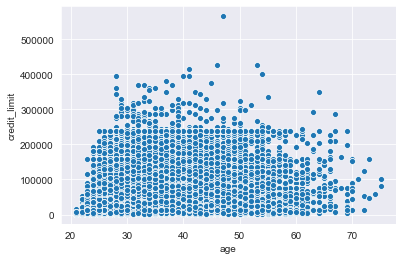

In [10]:
#bigger age does not imply bigger credit amount
sns.scatterplot(x='age', y='credit_limit', data=train)

In [11]:
#train[train.columns[1:]].corr()
train.columns

Index(['id', 'credit_limit', 'gender', 'education_level', 'marital_status',
       'age', 'payment_delay_month4(larger value means longer delay)',
       'payment_delay_month3(larger value means longer delay)',
       'payment_delay_month2(larger value means longer delay)',
       'payment_delay_month1(larger value means longer delay)',
       'bill_amount_month4', 'bill_amount_month3', 'bill_amount_month2',
       'bill_amount_month1', 'previous_payment_month4',
       'previous_payment_month3', 'previous_payment_month2',
       'previous_payment_month1', 'label_month5_payment'],
      dtype='object')

In [12]:
def get_redundant_pairs(df):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_top_abs_correlations(df, n=5):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]
#It seems that some columns are highly correlated
print("Top Absolute Correlations")
print(get_top_abs_correlations(train[train[train.columns[1:]].corr().columns],10))

Top Absolute Correlations
bill_amount_month4                                     bill_amount_month3                                       0.951159
bill_amount_month3                                     bill_amount_month2                                       0.939229
bill_amount_month2                                     bill_amount_month1                                       0.933521
bill_amount_month4                                     bill_amount_month2                                       0.903926
bill_amount_month3                                     bill_amount_month1                                       0.892756
bill_amount_month4                                     bill_amount_month1                                       0.861518
payment_delay_month2(larger value means longer delay)  payment_delay_month1(larger value means longer delay)    0.765796
payment_delay_month3(larger value means longer delay)  payment_delay_month2(larger value means longer delay)    0.757512
paymen

In [13]:
train[["bill_amount_month3","previous_payment_month4"]].corr()

,bill_amount_month3,previous_payment_month4
bill_amount_month3,1.000000,0.213591
previous_payment_month4,0.213591,1.000000


In [14]:
highly_correlated=["bill_amount_month4","bill_amount_month3","bill_amount_month2","bill_amount_month1"
                  ,"payment_delay_month4(larger value means longer delay)"
                  ,"payment_delay_month3(larger value means longer delay)"
                  ,"payment_delay_month2(larger value means longer delay)"
                  ,"payment_delay_month1(larger value means longer delay)"]

In [15]:
train.isnull().sum()

id                                                         0
credit_limit                                               0
gender                                                   156
education_level                                          218
marital_status                                           139
age                                                      217
payment_delay_month4(larger value means longer delay)     58
payment_delay_month3(larger value means longer delay)     73
payment_delay_month2(larger value means longer delay)     19
payment_delay_month1(larger value means longer delay)     62
bill_amount_month4                                       449
bill_amount_month3                                       515
bill_amount_month2                                       577
bill_amount_month1                                       507
previous_payment_month4                                   40
previous_payment_month3                                   30
previous_payment_month2 

In [16]:
y_train=train["label_month5_payment"]
print(train.shape)
print(test.shape)
data=pd.concat([train.drop("label_month5_payment",axis=1),test.drop("label_month5_payment",axis=1)],axis=0)
print(data.shape)

(20649, 19)
(3000, 19)
(23649, 18)


In [17]:
print(data["gender"].mode().values[0])
print(data["education_level"].mode().values[0])
print(data["marital_status"].mode().values[0])
data["gender"]=data["gender"].fillna(data["gender"].mode().values[0])
data["education_level"]=data["education_level"].fillna(data["education_level"].mode().values[0])
data["marital_status"]=data["marital_status"].fillna(data["marital_status"].mode().values[0])

F
university
single


In [18]:
data.isnull().sum()

id                                                         0
credit_limit                                               0
gender                                                     0
education_level                                            0
marital_status                                             0
age                                                      234
payment_delay_month4(larger value means longer delay)     72
payment_delay_month3(larger value means longer delay)     84
payment_delay_month2(larger value means longer delay)     24
payment_delay_month1(larger value means longer delay)     75
bill_amount_month4                                       519
bill_amount_month3                                       590
bill_amount_month2                                       649
bill_amount_month1                                       574
previous_payment_month4                                   48
previous_payment_month3                                   36
previous_payment_month2 

In [19]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=3, weights='uniform', metric='nan_euclidean')
columns=["credit_limit"]+list(data.columns[5:].values)
temp = imputer.fit_transform(data[columns])
temp=pd.DataFrame(temp)
temp.columns=columns
temp.head()

,credit_limit,age,payment_delay_month4(larger value means longer delay),payment_delay_month3(larger value means longer delay),payment_delay_month2(larger value means longer delay),payment_delay_month1(larger value means longer delay),bill_amount_month4,bill_amount_month3,bill_amount_month2,bill_amount_month1,previous_payment_month4,previous_payment_month3,previous_payment_month2,previous_payment_month1
0,75659.32872,53.0,-1.0,0.0,0.0,0.0,43.673872,97.336043,617.642189,515.513381,97.336043,617.642189,515.513381,0.000000
1,10119.28851,46.0,0.0,0.0,1.0,1.0,2.378414,217.039935,107.684919,220.712322,209.732445,0.000000,100.594674,22.241495
2,13374.80610,31.0,1.0,1.0,1.0,1.0,14301.916330,13506.342420,5892.633733,6291.752821,397.170110,752.120619,397.170110,397.501113
3,157744.09660,34.0,0.0,0.0,0.0,1.0,8154.002723,14278.876050,18234.124720,13042.939540,14368.707270,18400.055470,1547.887184,2.558114
4,120385.03030,29.0,1.0,1.0,1.0,1.0,10575.092340,7130.249304,1572.472869,706.473134,193.835523,397.170110,0.000000,1395.861422


In [20]:
new=data[["id","gender","education_level","marital_status"]]
new.index=list(range(len(new)))
df=pd.concat([new,temp],axis=1)
print(df.shape)

(23649, 18)


In [21]:
highly_correlated

['bill_amount_month4',
 'bill_amount_month3',
 'bill_amount_month2',
 'bill_amount_month1',
 'payment_delay_month4(larger value means longer delay)',
 'payment_delay_month3(larger value means longer delay)',
 'payment_delay_month2(larger value means longer delay)',
 'payment_delay_month1(larger value means longer delay)']

In [22]:
from sklearn.decomposition import TruncatedSVD
n_components = 1
tsvd = TruncatedSVD(n_components=n_components)
tsvd_result = tsvd.fit_transform(df[highly_correlated])

In [23]:
print(tsvd_result.shape)
print(tsvd.explained_variance_ratio_.sum())

(23649, 1)
0.9245505171484898


In [24]:
df=df.drop(highly_correlated,axis=1)
df["svd"]=tsvd_result

In [25]:
df.drop("id",axis=1,inplace=True)

In [26]:
df.columns[:3]

Index(['gender', 'education_level', 'marital_status'], dtype='object')

In [27]:
df=pd.concat([pd.get_dummies(df[df.columns[:3]]),df.drop(df.columns[:3],axis=1)],axis=1)

In [28]:
train=df[:train.shape[0]]
test=df[train.shape[0]:]
print(train.shape,test.shape)

(20649, 17) (3000, 17)


In [29]:
from sklearn.ensemble import RandomForestClassifier
!pip install xgboost
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [30]:
X_train, X_test, y_train1, y_test = train_test_split(train, y_train, test_size=0.2, random_state=1,stratify=y_train,shuffle=True)

In [ ]:
xlf = xgb.XGBClassifier(max_depth=8,
			learning_rate=0.005,
			n_estimators=3000,
			objective='binary:logistic',
			nthread=-1,
			gamma=0,
			reg_alpha=0.2,
            reg_lambda=0.2,            
			seed=1440,
			missing=None)

xlf.fit(X_train, y_train1)

In [ ]:
y_pred = xlf.predict(X_test)
y_train_pred=xlf.predict(X_train)
print('Accuracy (forest): %.5f' % accuracy_score(y_train1, y_train_pred))
print('Accuracy (forest): %.5f' % accuracy_score(y_test, y_pred))

In [ ]:
from plot import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

In [ ]:
conf_forest = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(conf_forest, [0,1],title="Forest"+"Confusion Matrix plot", cmap=plt.cm.Reds)

In [ ]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, y_pred)

In [ ]:
#y_pred

In [ ]:
ans=[]
for i in np.arange(0,1,0.01):
    y_pred=np.where(xlf.predict_proba(X_test)[:,1]>=i, 1,0)
    ans.append(roc_auc_score(y_test, y_pred))

In [ ]:
i=np.argmax(ans)
print(ans[i],np.arange(0,1,0.01)[i])

In [ ]:
y_pred=np.where(xlf.predict_proba(X_test)[:,1]>=np.arange(0,1,0.01)[i],1,0)
roc_auc_score(y_test, y_pred)

# 根據不同的應用來調整不同的threshold
分別去計算不同類型誤判的損失，選擇可以給出最低損失的threshold

In [ ]:
testID=pd.read_csv("test.csv")
testID=pd.DataFrame(testID["id"])

In [ ]:
testID["predict"]=xlf.predict(test)

In [ ]:
testID.head()

In [ ]:
pd.value_counts(testID["predict"])

In [ ]:
testID=testID.set_index("id")
testID.to_csv("final.csv")